In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [2]:
# task 1
df = pd.read_csv('DS3_C1_S2_Store_Item_Sales_Data_Challenge.csv',index_col = 'date' , parse_dates =['date'])
df

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


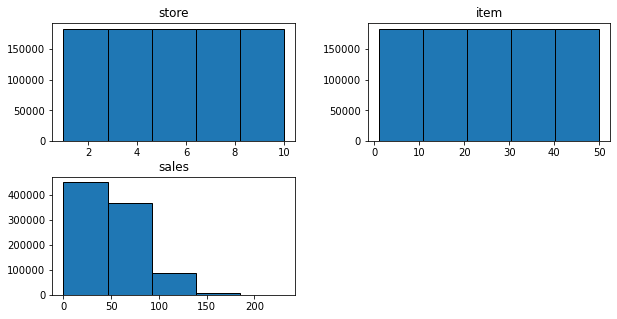

In [3]:
df.hist(grid = False, bins = 5, figsize=(10,5), edgecolor = 'black');

In [4]:
sales = df.sales
store = df.store
item = df.item

In [5]:
sales

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
              ..
2017-12-27    63
2017-12-28    59
2017-12-29    74
2017-12-30    62
2017-12-31    82
Name: sales, Length: 913000, dtype: int64

<AxesSubplot:xlabel='date'>

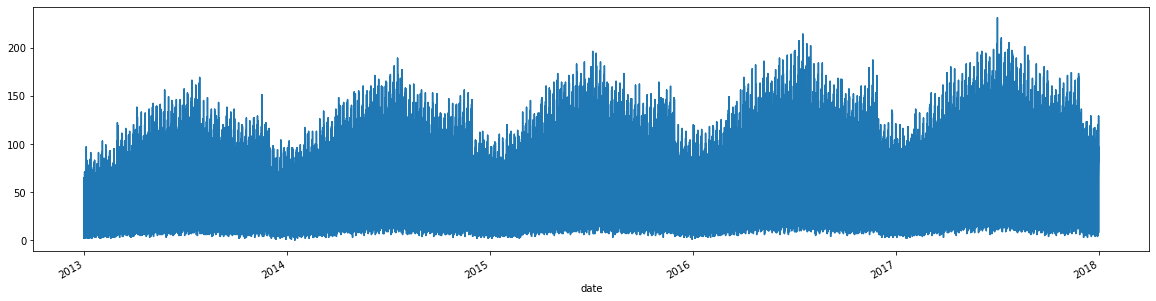

In [6]:
df.sales.plot(figsize=(20, 5))

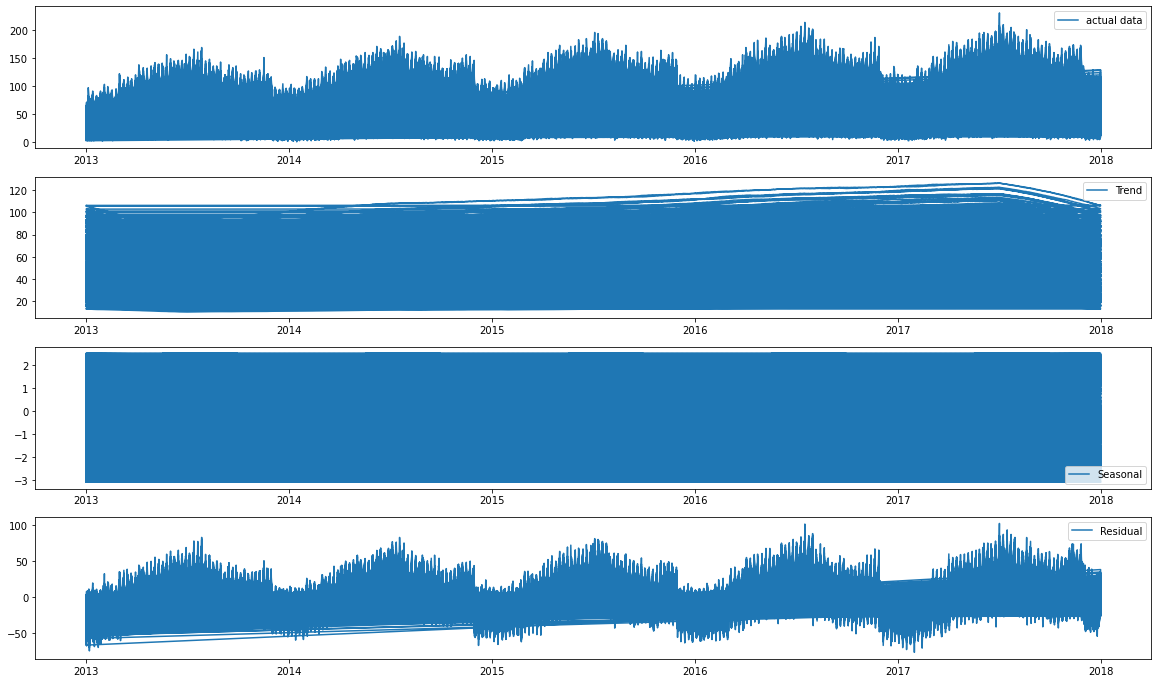

In [7]:
# task 2

decomposition = seasonal_decompose(sales, period = 365)
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(sales,label='actual data')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

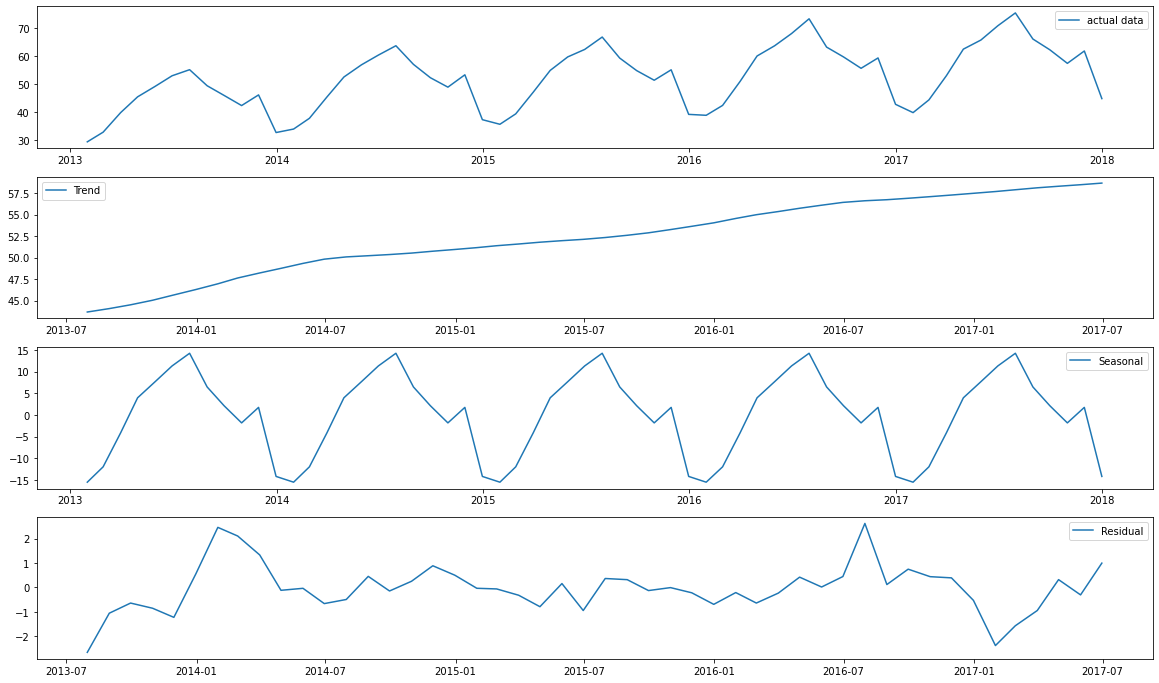

In [8]:
df1 = df['sales'].resample('M').mean()

decomposition = seasonal_decompose(df1 , period = 12)
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(df1,label='actual data')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

In [9]:
# task 3

def checkstationary(data):
    pvalue = adfuller(data['sales'].resample('M').mean())[1]
    print(pvalue)
    
    if pvalue < 0.05:
        print('Data is Stationary')
    else:
        print('Data is not stationary')
checkstationary(df)

3.692387626163227e-06
Data is Stationary


In [10]:
# task 4

# simple

df1 = sales.resample('M').mean()
def simplesmoothing(data , alpha):
    model1 = SimpleExpSmoothing(data).fit(smoothing_level = alpha)
    pdct = model1.fittedvalues
    ndf = pd.DataFrame({'Actual' : data , 'Forecast' : pdct})
    return ndf

alphas = [0 , 0.2 , 0.6 , 0.8]
d_simple_exp = {}

for i in alphas:
    simple_df = simplesmoothing(df1 , i)
    d_simple_exp[i] = simple_df['Forecast']

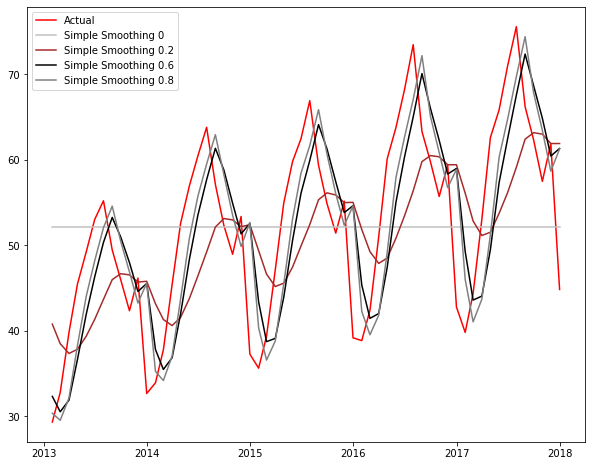

In [11]:
plt.figure(figsize = (10,8))

colors = ['silver' , 'brown' , 'black' , 'gray']
plt.plot(df1 , c = 'red' , label = 'Actual')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]] , c = colors[i] , label = f'Simple Smoothing {alphas[i]}')
    plt.legend()

In [12]:
# double

alpha = 0.25
beta = 0.45
model2 = ExponentialSmoothing(df1, trend = 'additive').fit(smoothing_level=alpha, smoothing_trend=beta)
f_dexp = model2.fittedvalues
f_dexp

date
2013-01-31    40.657808
2013-02-28    39.612563
2013-03-31    38.930673
2013-04-30    40.274453
2013-05-31    43.281926
2013-06-30    47.147095
2013-07-31    51.658496
2013-08-31    55.988047
2013-09-30    57.063675
2013-10-31    55.756372
2013-11-30    52.360517
2013-12-31    50.071827
2014-01-31    43.026246
2014-02-28    37.031836
2014-03-31    33.586636
2014-04-30    34.247277
2014-05-31    38.595668
2014-06-30    45.014311
2014-07-31    52.439581
2014-08-31    60.125119
2014-09-30    63.884942
2014-10-31    64.207777
2014-11-30    61.889198
2014-12-31    60.299937
2015-01-31    52.496729
2015-02-28    44.336762
2015-03-31    38.592572
2015-04-30    37.192642
2015-05-31    40.093608
2015-06-30    45.695232
2015-07-31    52.454318
2015-08-31    60.263393
2015-09-30    64.134623
2015-10-31    64.874913
2015-11-30    63.054936
2015-12-31    61.738774
2016-01-31    54.221303
2016-02-29    46.773053
2016-03-31    41.582065
2016-04-30    40.904545
2016-05-31    44.835623
2016-06-30 

In [13]:
model2.forecast(12)

2018-01-31    61.185216
2018-02-28    59.103232
2018-03-31    57.021249
2018-04-30    54.939266
2018-05-31    52.857283
2018-06-30    50.775299
2018-07-31    48.693316
2018-08-31    46.611333
2018-09-30    44.529350
2018-10-31    42.447366
2018-11-30    40.365383
2018-12-31    38.283400
Freq: M, dtype: float64

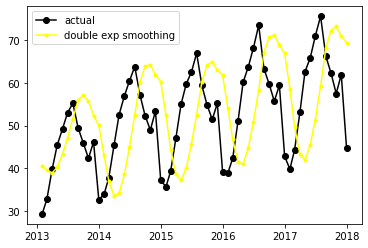

In [14]:
plt.plot(df1, marker = 'o', color = 'black', label = 'actual')
plt.plot(f_dexp, marker = '.', color = 'yellow', label = 'double exp smoothing')
plt.legend()

In [15]:
# triple

alpha = 0.37
beta = 0.5
gamma = 0.15

model3 = ExponentialSmoothing(df1, trend = 'add', seasonal = 'add', seasonal_periods = 12).fit(smoothing_level=alpha, smoothing_trend=beta)
predicted_model3 = model3.fittedvalues
predicted_model3

date
2013-01-31    29.348672
2013-02-28    33.052546
2013-03-31    40.053467
2013-04-30    45.350675
2013-05-31    48.272590
2013-06-30    51.486205
2013-07-31    53.629520
2013-08-31    47.558167
2013-09-30    44.487305
2013-10-31    41.506916
2013-11-30    45.477863
2013-12-31    31.752955
2014-01-31    34.579217
2014-02-28    39.568421
2014-03-31    47.398519
2014-04-30    53.344893
2014-05-31    57.368795
2014-06-30    61.089739
2014-07-31    62.691602
2014-08-31    56.801278
2014-09-30    52.757233
2014-10-31    48.163147
2014-11-30    51.513823
2014-12-31    38.085351
2015-01-31    38.677819
2015-02-28    41.027009
2015-03-31    47.765891
2015-04-30    54.202906
2015-05-31    58.509967
2015-06-30    62.540848
2015-07-31    65.384693
2015-08-31    59.166736
2015-09-30    54.591132
2015-10-31    51.141984
2015-11-30    55.007365
2015-12-31    38.979685
2016-01-31    38.430719
2016-02-29    43.472850
2016-03-31    51.728815
2016-04-30    59.620660
2016-05-31    64.748609
2016-06-30 

In [16]:
model3.forecast(12)

2018-01-31    43.247585
2018-02-28    48.198574
2018-03-31    57.100491
2018-04-30    66.413943
2018-05-31    69.577860
2018-06-30    74.175081
2018-07-31    78.227884
2018-08-31    68.207773
2018-09-30    63.903014
2018-10-31    59.093867
2018-11-30    63.426977
2018-12-31    47.047922
Freq: M, dtype: float64

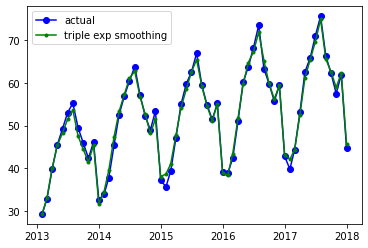

In [17]:
plt.plot(df1, marker = 'o', color = 'blue', label = 'actual')
plt.plot(predicted_model3, marker = '.', color = 'green', label = 'triple exp smoothing')
plt.legend()